In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

In [3]:
data = sns.load_dataset('mpg')
data.drop(columns='name',inplace=True)
data['horsepower'].mean()
data['horsepower'] = data['horsepower'].fillna(104.4)
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data['origin'] = encoder.fit_transform(data['origin'])

In [81]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Assuming X contains the feature 'total_bill' and y contains the target 'tip'
X = data[['horsepower']]
y = data['mpg']

# Generate polynomial features (degree=2 for example)
poly = PolynomialFeatures(degree=20)
X_poly = poly.fit_transform(X)

# Fit the model
model = LinearRegression()
model.fit(X_poly, y)

# Predict y values using the model
y_pred = model.predict(X_poly)

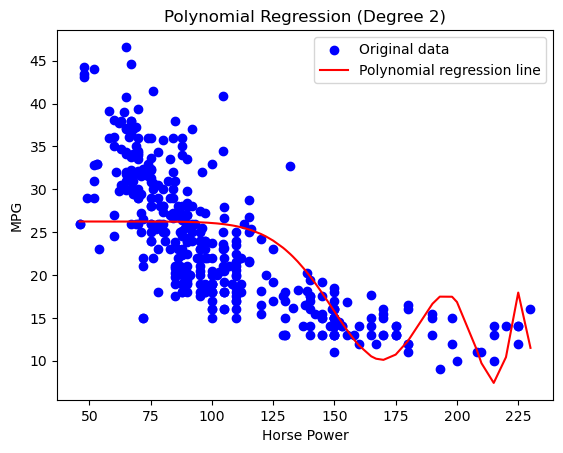

In [83]:
# Sort the values for a smooth curve
sort_axis = np.argsort(X['horsepower'].values)
X_sorted = X['horsepower'].values[sort_axis]
y_pred_sorted = y_pred[sort_axis]

# Plot the original data points
plt.scatter(X, y, color='blue', label='Original data')

# Plot the polynomial regression line
plt.plot(X_sorted, y_pred_sorted, color='red', label='Polynomial regression line')

# Add labels and title
plt.xlabel('Horse Power')
plt.ylabel('MPG')
plt.title('Polynomial Regression (Degree 2)')
plt.legend()

# Show the plot
plt.show()

# 3D

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import Axes3D

# Define your features and target
X = data[['horsepower', 'displacement', 'cylinders']]
y = data['mpg']

# Generate polynomial features (degree=2 for example)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Fit the model
model = LinearRegression()
model.fit(X_poly, y)

# Predict tips using the model
y_pred = model.predict(X_poly)


C:\Users\ABDUL HAMEED\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


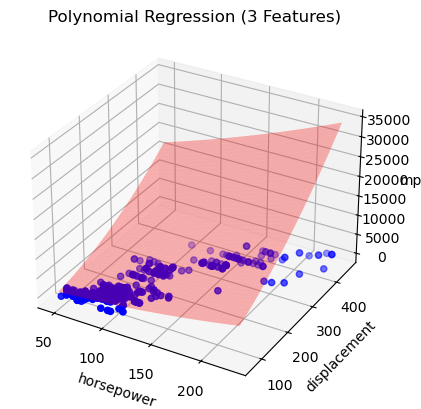

In [47]:
# Plotting the 3D plot for two features
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the actual data points
ax.scatter(X['horsepower'], X['displacement'], y, color='blue', label='Original data')

# Plot the regression surface
X1, X2 = np.meshgrid(np.linspace(X['horsepower'].min(), X['horsepower'].max(), 100),
                     np.linspace(X['displacement'].min(), X['displacement'].max(), 100))
X3 = (X1 + X2) / 2  # or you could use the mean of `price_per_person` or other logic
Z = model.predict(poly.transform(np.c_[X1.ravel(), X2.ravel(), X3.ravel()]))
Z = Z.reshape(X1.shape)

ax.plot_surface(X1, X2, Z, color='red', alpha=0.3, label='Polynomial regression surface')

# Labels and title
ax.set_xlabel('horsepower')
ax.set_ylabel('displacement')
ax.set_zlabel('mpg')
ax.set_title('Polynomial Regression (3 Features)')

plt.show()